In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import os
import sys
sys.path.append(os.path.abspath("../src"))   
import soporte_regresion as f

In [2]:
df_encoded=pd.read_csv("..\datos3_mejorado\datos_nulos_encoded.csv", index_col=0).reset_index(drop=True)

In [3]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354461 entries, 0 to 354460
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   price                354461 non-null  int64  
 1   vehicleType          354461 non-null  float64
 2   yearOfRegistration   354461 non-null  float64
 3   gearbox              354461 non-null  float64
 4   monthOfRegistration  354461 non-null  float64
 5   fuelType             354461 non-null  float64
 6   brand                354461 non-null  float64
 7   notRepairedDamage    354461 non-null  float64
 8   yearCreated          354461 non-null  float64
 9   monthCreated         354461 non-null  float64
 10  powerCV_est          354461 non-null  float64
 11  kilometer_est        354461 non-null  float64
 12  abtest_control       354461 non-null  float64
 13  abtest_test          354461 non-null  float64
dtypes: float64(13), int64(1)
memory usage: 37.9 MB


In [4]:
df_encoded.head()

,price,vehicleType,yearOfRegistration,gearbox,monthOfRegistration,fuelType,brand,notRepairedDamage,yearCreated,monthCreated,powerCV_est,kilometer_est,abtest_control,abtest_test
0,480,4935.879639,4378.441949,4478.406800,2381.090365,4396.468347,5180.260775,3122.565903,5361.431165,5313.222076,5.609408e-16,0.602568,0.0,1.0
1,18300,8258.356425,10410.250848,4478.406800,5552.583094,8060.670023,8154.224908,2163.409610,5361.431165,5313.222076,1.302122e+00,-0.039655,0.0,1.0
2,9800,11675.673003,4378.441949,9140.733471,5574.330864,8060.670023,9694.702270,3122.565903,5361.431165,5313.222076,7.889772e-01,-0.039655,0.0,1.0
3,1500,2802.746787,4378.441949,4478.406800,5628.719082,4396.468347,5180.260775,6357.024577,5361.431165,5313.222076,-9.280852e-01,0.602568,0.0,1.0
4,3600,2802.746787,4378.441949,4478.406800,5867.287438,8060.670023,6433.970155,6357.024577,5361.431165,5313.222076,-1.046503e+00,-0.938767,0.0,1.0


In [5]:
df_encoded.duplicated().sum()

np.int64(20865)

Separamos en x e y

In [6]:
x= df_encoded.drop(columns="price")
y= df_encoded[["price"]]

In [7]:
x.head()

,vehicleType,yearOfRegistration,gearbox,monthOfRegistration,fuelType,brand,notRepairedDamage,yearCreated,monthCreated,powerCV_est,kilometer_est,abtest_control,abtest_test
0,4935.879639,4378.441949,4478.406800,2381.090365,4396.468347,5180.260775,3122.565903,5361.431165,5313.222076,5.609408e-16,0.602568,0.0,1.0
1,8258.356425,10410.250848,4478.406800,5552.583094,8060.670023,8154.224908,2163.409610,5361.431165,5313.222076,1.302122e+00,-0.039655,0.0,1.0
2,11675.673003,4378.441949,9140.733471,5574.330864,8060.670023,9694.702270,3122.565903,5361.431165,5313.222076,7.889772e-01,-0.039655,0.0,1.0
3,2802.746787,4378.441949,4478.406800,5628.719082,4396.468347,5180.260775,6357.024577,5361.431165,5313.222076,-9.280852e-01,0.602568,0.0,1.0
4,2802.746787,4378.441949,4478.406800,5867.287438,8060.670023,6433.970155,6357.024577,5361.431165,5313.222076,-1.046503e+00,-0.938767,0.0,1.0


In [8]:
y.head()

,price
0,480
1,18300
2,9800
3,1500
4,3600


Separamos en train y test y le hacemos aprender

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size= 0.7, random_state=42)
modelo_lineal= LinearRegression()
modelo_lineal.fit(x_train, y_train) 

LinearRegression()

Ahora hacemos la predicción

In [10]:
y_test_pred=modelo_lineal.predict(x_test)         #con esto predice un precio
y_train_pred= modelo_lineal.predict(x_train)

In [11]:
metricas = {
    'train': {
        'r2_score': r2_score(y_train, y_train_pred),
        'MAE': mean_absolute_error(y_train, y_train_pred),
        'MSE': mean_squared_error(y_train, y_train_pred),
        'RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred))
    },
    'test': {
        'r2_score': r2_score(y_test, y_test_pred),
        'MAE': mean_absolute_error(y_test, y_test_pred),
        'MSE': mean_squared_error(y_test, y_test_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred))

    }
}

In [12]:
metricas_pd=pd.DataFrame(metricas)

In [13]:
metricas_pd.head().T

,r2_score,MAE,MSE,RMSE
train,0.606636,2681.451098,1.418641e+07,3766.485065
test,0.602940,2688.575483,1.424931e+07,3774.825491


In [14]:
metricas_pd.reset_index(inplace=True)

In [15]:
metricas_pd

,index,train,test
0,r2_score,6.066358e-01,6.029398e-01
1,MAE,2.681451e+03,2.688575e+03
2,MSE,1.418641e+07,1.424931e+07
3,RMSE,3.766485e+03,3.774825e+03


Dado que coinciden bastante las RMSE, no se está dando ni over fitting ni under fitting

Vamos a intentar visualizar las cositas

In [16]:
predytets=pd.DataFrame(y_test_pred, columns=["y_test_pred"])

In [17]:
predytrain=pd.DataFrame(y_train_pred, columns=["y_train_pred"])

In [18]:
df_fin=pd.DataFrame()
df_fin=pd.concat([df_fin, predytets, predytrain, y], ignore_index=True, axis=1)

In [19]:
df_fin.columns= ["test pre", "train pre", "pre"]

In [20]:
df_fin.reset_index(inplace=True)

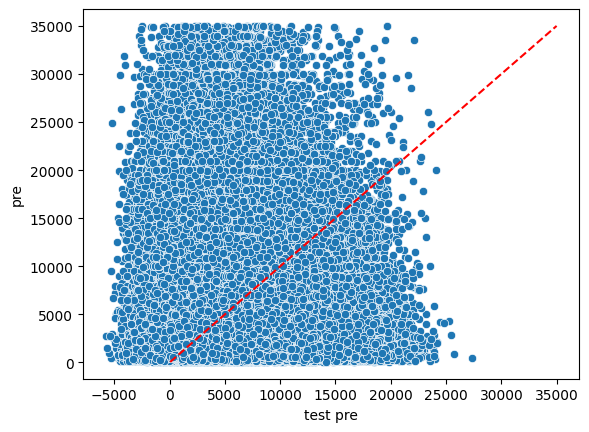

In [21]:
sns.scatterplot(x="test pre", y="pre", data= df_fin)
plt.plot([df_fin["pre"].min(), df_fin["pre"].max()],
         [df_fin["pre"].min(), df_fin["pre"].max()],
         color='red', linestyle='--', label='x = y')

In [22]:
df_fino=df_fin[df_fin["pre"] <100000]

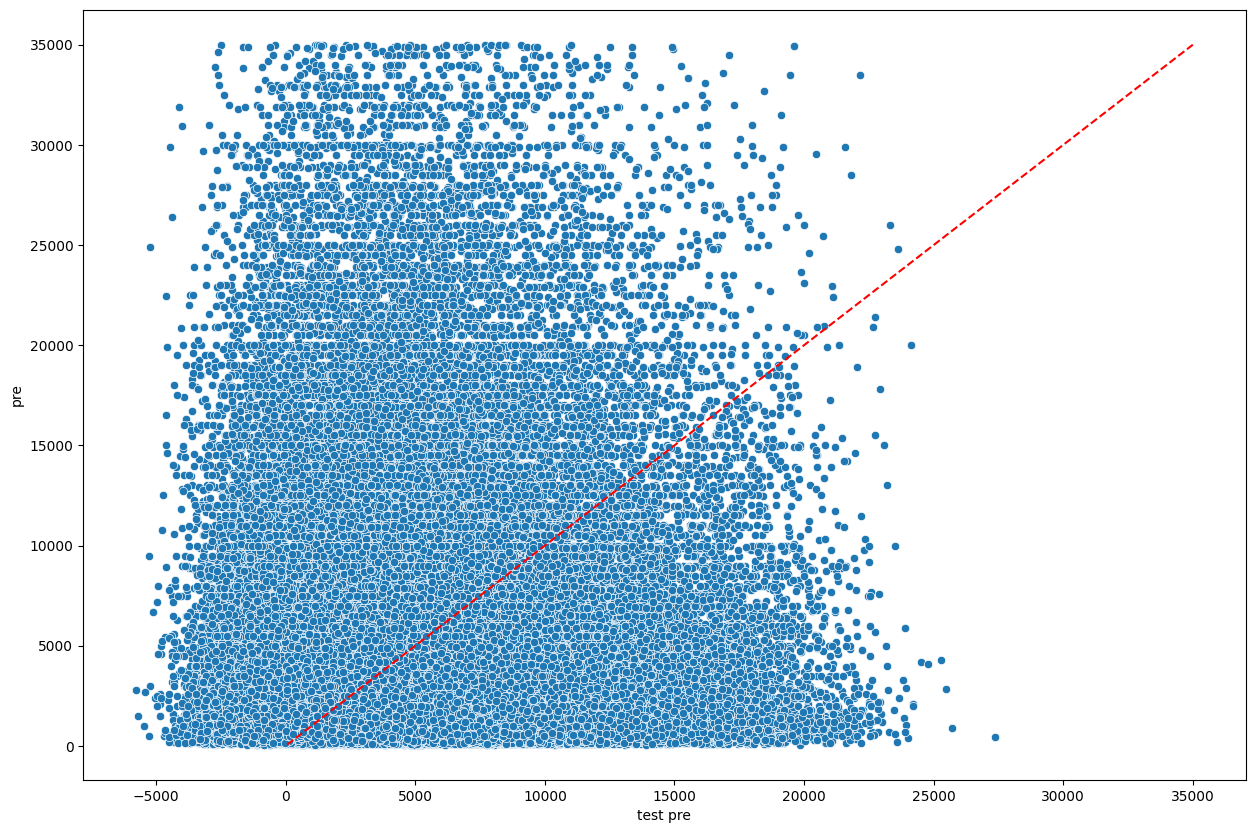

In [23]:
plt.figure(figsize=(15,10))
sns.scatterplot(x="test pre", y="pre", data= df_fino)
plt.plot([df_fino["pre"].min(), df_fino["pre"].max()],
         [df_fino["pre"].min(), df_fino["pre"].max()],
         color='red', linestyle='--', label='x = y')

<Axes: xlabel='train pre', ylabel='pre'>

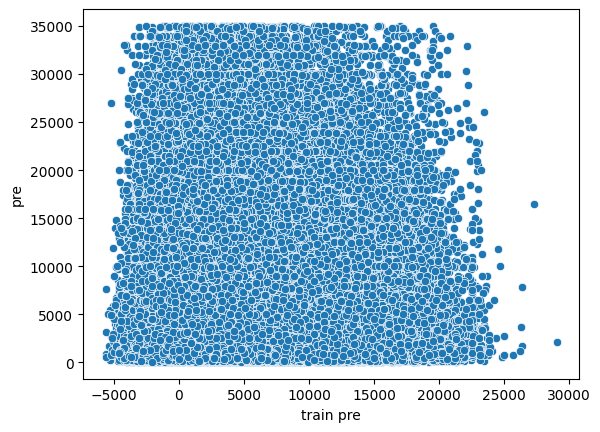

In [24]:
sns.scatterplot(x="train pre", y="pre", data= df_fin)

VOY A PROBAR COGIENDO UN 80 DE ENTRENAMIENTO

In [25]:
x_train80, x_test80, y_train80, y_test80 = train_test_split(x, y, train_size= 0.8, random_state=42)
modelo_lineal80= LinearRegression()
modelo_lineal80.fit(x_train80, y_train80) 

LinearRegression()

Ahora hacemos la predicción

In [26]:
y_test_pred80=modelo_lineal80.predict(x_test80)         #con esto predice un precio
y_train_pred80= modelo_lineal80.predict(x_train80)

In [27]:
metricas80 = {
    'train': {
        'r2_score': r2_score(y_train80, y_train_pred80),
        'MAE': mean_absolute_error(y_train80, y_train_pred80),
        'MSE': mean_squared_error(y_train80, y_train_pred80),
        'RMSE': np.sqrt(mean_squared_error(y_train80, y_train_pred80))
    },
    'test': {
        'r2_score': r2_score(y_test80, y_test_pred80),
        'MAE': mean_absolute_error(y_test80, y_test_pred80),
        'MSE': mean_squared_error(y_test80, y_test_pred80),
        'RMSE': np.sqrt(mean_squared_error(y_test80, y_test_pred80))

    }
}

In [28]:
metricas80_pd=pd.DataFrame(metricas80)

In [29]:
metricas80_pd.head().T

,r2_score,MAE,MSE,RMSE
train,0.606303,2680.010314,1.416732e+07,3763.950534
test,0.602467,2696.984854,1.435669e+07,3789.022281


In [30]:
metricas80_pd.reset_index(inplace=True)

In [31]:
metricas80_pd

,index,train,test
0,r2_score,6.063033e-01,6.024667e-01
1,MAE,2.680010e+03,2.696985e+03
2,MSE,1.416732e+07,1.435669e+07
3,RMSE,3.763951e+03,3.789022e+03


Dado que coinciden bastante las RMSE, no se está dando ni over fitting ni under fitting

Vamos a intentar visualizar las cositas

In [32]:
predytets80=pd.DataFrame(y_test_pred80, columns=["y_test_pred80"])

In [33]:
predytrain80=pd.DataFrame(y_train_pred80, columns=["y_train_pred80"])

In [34]:
df_fin80=pd.DataFrame()
df_fin80=pd.concat([df_fin80, predytets80, predytrain80, y], ignore_index=True, axis=1)

In [35]:
df_fin80.columns= ["test pre80", "train pre80", "pre"]

In [36]:
df_fin80.reset_index(inplace=True)

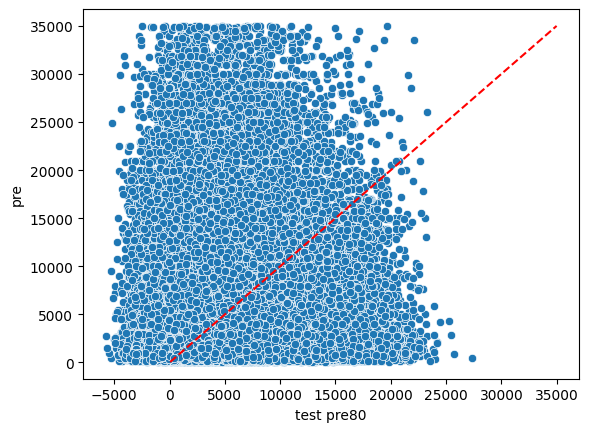

In [37]:
sns.scatterplot(x="test pre80", y="pre", data= df_fin80)
plt.plot([df_fin80["pre"].min(), df_fin80["pre"].max()],
         [df_fin80["pre"].min(), df_fin80["pre"].max()],
         color='red', linestyle='--', label='x = y')

In [38]:
df_fino80=df_fin80[df_fin80["pre"] <100000]

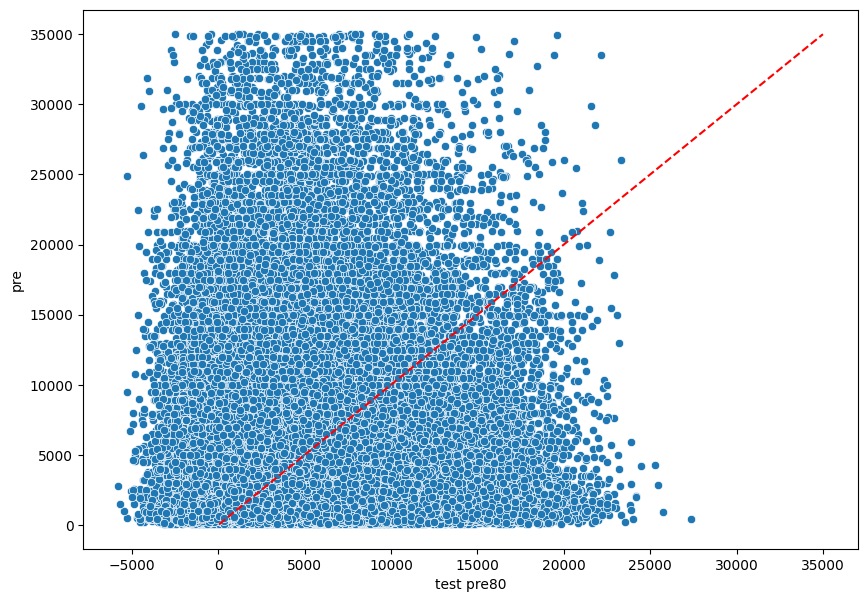

In [39]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="test pre80", y="pre", data= df_fino80)
plt.plot([df_fino["pre"].min(), df_fino["pre"].max()],
         [df_fino["pre"].min(), df_fino["pre"].max()],
         color='red', linestyle='--', label='x = y')

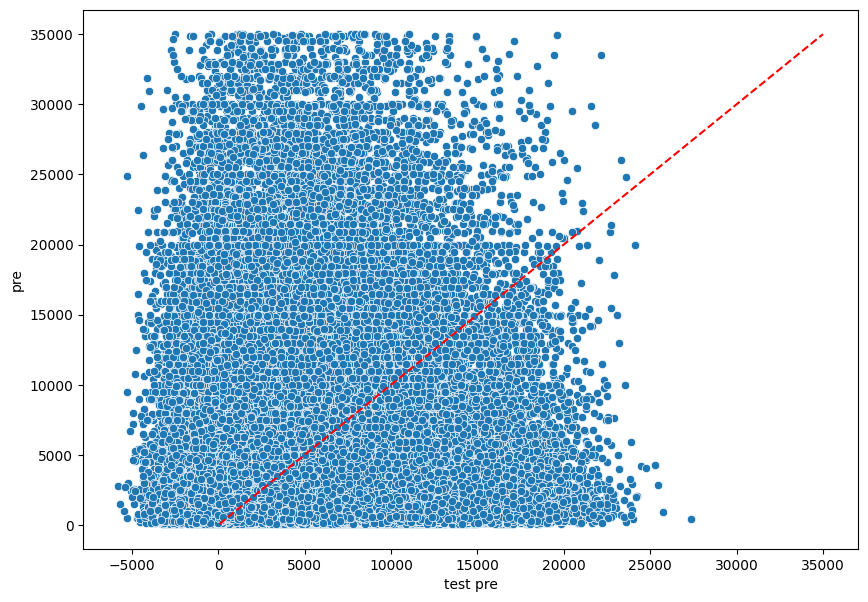

In [40]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="test pre", y="pre", data= df_fino)
plt.plot([df_fino["pre"].min(), df_fino["pre"].max()],
         [df_fino["pre"].min(), df_fino["pre"].max()],
         color='red', linestyle='--', label='x = y')

<Figure size 1000x800 with 0 Axes>

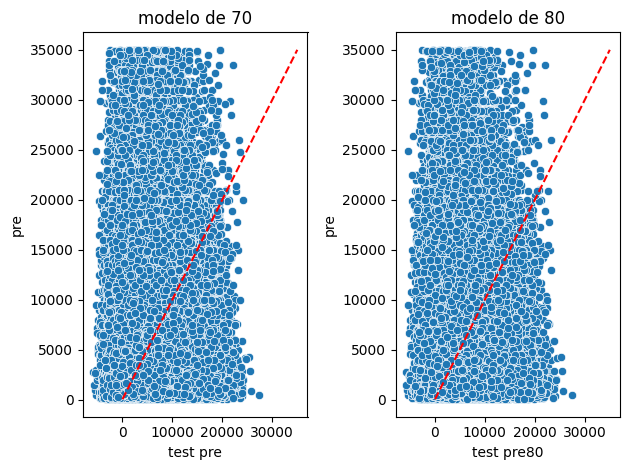

In [41]:
plt.figure(figsize=(10,8))
fig, axes =plt.subplots(nrows=1, ncols=2)
axes=axes.flat

sns.scatterplot(x="test pre", y="pre", data= df_fino, ax=axes[0])
axes[0].plot([df_fino["pre"].min(), df_fino["pre"].max()],
         [df_fino["pre"].min(), df_fino["pre"].max()],
         color='red', linestyle='--', label='x = y')
axes[0].set_title("modelo de 70")



sns.scatterplot(x="test pre80", y="pre", data= df_fino80, ax= axes[1])
axes[1].plot([df_fino["pre"].min(), df_fino["pre"].max()],
         [df_fino["pre"].min(), df_fino["pre"].max()],
         color='red', linestyle='--', label='x = y')
axes[1].set_title("modelo de 80")
plt.tight_layout()

In [42]:
metricas_pd

,index,train,test
0,r2_score,6.066358e-01,6.029398e-01
1,MAE,2.681451e+03,2.688575e+03
2,MSE,1.418641e+07,1.424931e+07
3,RMSE,3.766485e+03,3.774825e+03


In [43]:
metricas80_pd

,index,train,test
0,r2_score,6.063033e-01,6.024667e-01
1,MAE,2.680010e+03,2.696985e+03
2,MSE,1.416732e+07,1.435669e+07
3,RMSE,3.763951e+03,3.789022e+03


Observando las métricas, el modelo de 80 es mejor pues consigue reducir las diferencias entre el grupo de testeto y el de entrenamiento lo que significa que los resultados del test están siendo más parecidos a los del entreneamiento. Además, aunque se observa una pequeña bajada en el r2 score del test y una ligera subida de su RMSE, esto tiene sentido pues se ha reducido la muestra del grupo del test al aumentar la muetsra de entrenamiento.

Creamos un dataframe con el valor real y los residuos para ambas formas de entrenar 

In [44]:
df_residuos= y_test_pred - y_test
df_residuos80= y_test_pred80 - y_test80

In [45]:
df_con_residuos=pd.DataFrame()
df_con_residuos=pd.concat([df_con_residuos,df_residuos, y_test], ignore_index=True, axis=1)

df_con_residuos80=pd.DataFrame()
df_con_residuos80=pd.concat([df_con_residuos80,df_residuos80, y_test80], ignore_index=True, axis=1)

In [46]:
df_con_residuos.columns=["residuo", "precio original"]
df_con_residuos80.columns=["residuo80", "precio original80"]

In [47]:
df_con_residuos.head()

,residuo,precio original
249606,1898.419621,1000
298056,-1826.370200,1350
31544,1318.108226,11990
88316,3150.051581,2000
340642,-1411.462903,3999


In [48]:
df_con_residuos80.head()

,residuo80,precio original80
249606,1894.171648,1000
298056,-1827.446484,1350
31544,1322.239584,11990
88316,3141.985589,2000
340642,-1408.495091,3999


Text(0.5, 1.0, 'Diferencias ')

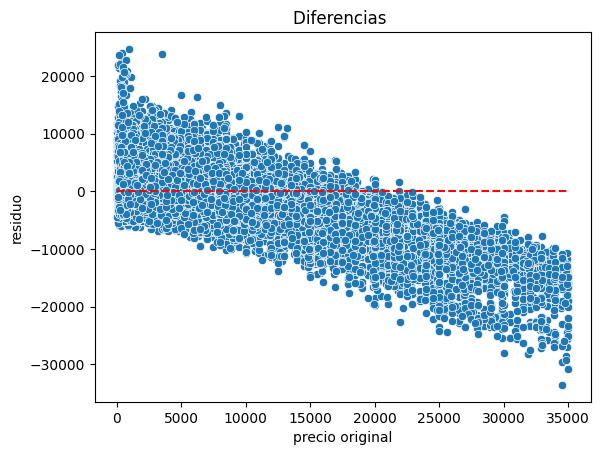

In [49]:


sns.scatterplot(x="precio original", y="residuo", data= df_con_residuos)
plt.plot([df_con_residuos["precio original"].min(), df_con_residuos["precio original"].max()],
         [0,0],
         color='red', linestyle='--', label='x = y')
plt.title("Diferencias ")





Text(0.5, 1.0, 'Diferencias80 ')

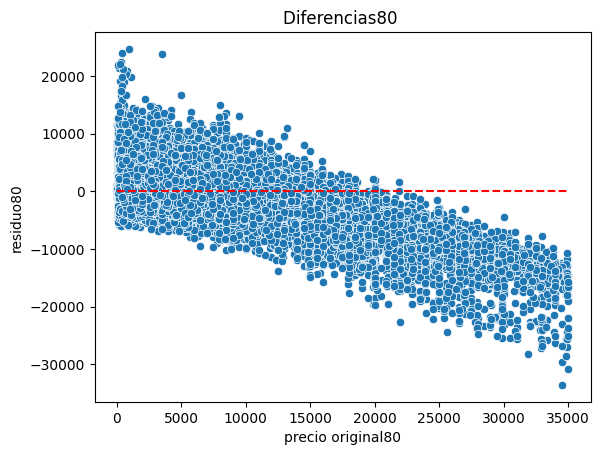

In [50]:
sns.scatterplot(x="precio original80", y="residuo80", data= df_con_residuos80)
plt.plot([df_con_residuos80["precio original80"].min(), df_con_residuos80["precio original80"].max()],
         [0,0],
         color='red', linestyle='--', label='x = y')
plt.title("Diferencias80 ")

<Figure size 1000x1800 with 0 Axes>

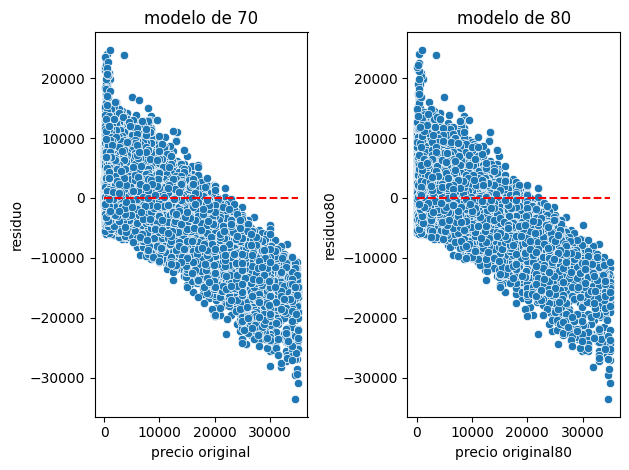

In [51]:
plt.figure(figsize=(10,18))
fig, axes =plt.subplots(nrows=1, ncols=2)
axes=axes.flat


sns.scatterplot(x="precio original", y="residuo", data= df_con_residuos, ax= axes[0])
axes[0].plot([df_con_residuos["precio original"].min(), df_con_residuos["precio original"].max()],
         [0,0],
         color='red', linestyle='--', label='x = y')
axes[0].set_title("modelo de 70")



sns.scatterplot(x="precio original80", y="residuo80", data= df_con_residuos80, ax=axes[1])
axes[1].plot([df_con_residuos80["precio original80"].min(), df_con_residuos80["precio original80"].max()],
         [0,0],
         color='red', linestyle='--', label='x = y')

axes[1].set_title("modelo de 80")
plt.tight_layout()

Aquí observamos como los residuos se alejan de la línea 0 que representa que no haya diferencias entre los valores predichos y los valores reales